# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
# from sklearn.cluster import KMeans
import random as rd

In [2]:
data = pd.read_csv("Customer data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


<function matplotlib.pyplot.show(close=None, block=None)>

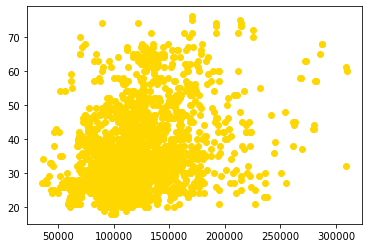

In [3]:
X = data
plt.scatter(X["Income"],X["Age"],c='gold')
plt.show

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [4]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type ):
## write code here for the Distance function here #
    Cluster_Distance = np.zeros((Data_points.shape[0], Cluster_Centroids.shape[0]))
    for j in range(Cluster_Centroids.shape[0]):
        if Distance_Type=='Euclidian':
            Cluster_Distance[:, j] = np.sqrt(np.sum(np.square(Data_points - Cluster_Centroids[j]), axis = 1))
        elif Distance_Type=='Pearson':
            c = (Cluster_Centroids[j] - np.mean(Cluster_Centroids[j]))
            d = (Data_points - np.mean(Data_points, axis = 1).reshape(Data_points.shape[0] , -1))
            Cluster_Distance[:, j] = 1-np.sum(c*d, axis = 1)/np.sqrt(np.sum(np.square(c))* np.sum(np.square(d), axis = 1))
    return Cluster_Distance 


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [5]:
# def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
#     k = Number_of_Clusters
#     Centroids = (Data_points.sample(n=K))
#        # write code for intial cluster heads here 
#        # write your your loop 
    
#     return [ Final_Cluster_Distance , Cluster_Metric ]    

In [6]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    Data_points_np = np.array(Data_points)
    best_cluster_centroids = np.zeros((Number_of_Clusters, Data_points_np.shape[1]))
    best_distortionF = 1e17
    best_nearest_clusters = np.zeros(Data_points_np.shape[0])

    for iter in range(100):
      Cluster_Centroids_indices = np.random.choice(np.arange(Data_points_np.shape[0]), Number_of_Clusters, replace = False)
      Cluster_Centroids = Data_points_np[Cluster_Centroids_indices]
      nearest_clusters = np.zeros(Data_points_np.shape[0])
      iter_old_distortionf = 0
      iter_new_distortionf = 1
      while np.abs(iter_old_distortionf - iter_new_distortionf) > 0.000001:
          iter_old_distortionf = iter_new_distortionf
          Cluster_Distance = GUC_Distance(Cluster_Centroids, Data_points_np, Distance_Type)
          nearest_clusters = np.argmin(Cluster_Distance, axis = 1) 
          new_clusters = np.zeros((Number_of_Clusters, Data_points_np.shape[1]))
          num_in_clusters = np.zeros((Number_of_Clusters, 1))
          for i in range(Data_points_np.shape[0]):
              new_clusters[nearest_clusters[i]] = new_clusters[nearest_clusters[i]] + Data_points_np[i]
              num_in_clusters[nearest_clusters[i]] = num_in_clusters[nearest_clusters[i]] + 1
          
          Cluster_Centroids = new_clusters / (num_in_clusters);
        
          cluster_erros = np.zeros(Data_points_np.shape[0])
          for i in range(Data_points_np.shape[0]):
              if(Distance_Type == "Ecluidian"):
                cluster_erros[i] = np.sqrt(np.sum(np.square(Data_points_np[i] - Cluster_Centroids[nearest_clusters[i]])))
              else:
                c = (Cluster_Centroids[nearest_clusters[i]] - np.mean(Cluster_Centroids[nearest_clusters[i]]))
                d = Data_points_np[i] - np.mean(Data_points_np[i])
                cluster_erros[i] = 1-np.sum(c*d)/np.sqrt(np.sum(np.square(c))* np.sum(np.square(d)))
                
          iter_new_distortionf = np.mean(cluster_erros)
          if(iter_new_distortionf < best_distortionF):
            best_distortionF = iter_new_distortionf
            best_nearest_clusters = np.copy(nearest_clusters)
            best_cluster_centroids = np.copy(Cluster_Centroids)

    return [ best_cluster_centroids , best_distortionF, best_nearest_clusters]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [7]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [16]:
# helper function that allows us to display data in 2 dimensions and highlights the clusters
def display_cluster(X,km=[],num_clusters=0, cluster_centers_ = [], labels_ = []):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[labels_==i,0],X[labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(cluster_centers_[i][0],cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

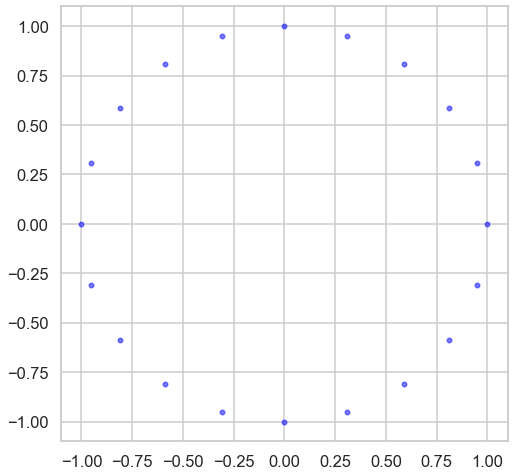

In [9]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

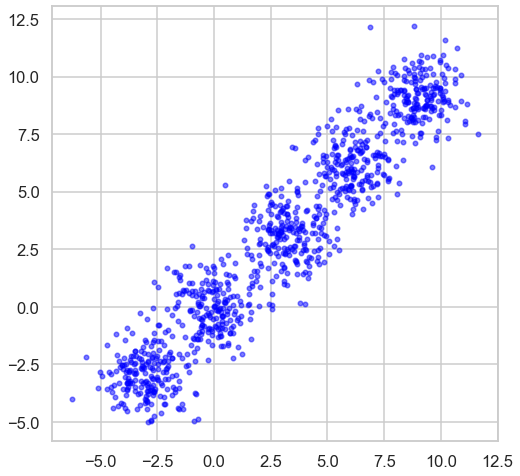

In [10]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

#### 2.3. Example 3 : moons Data Gen and display 

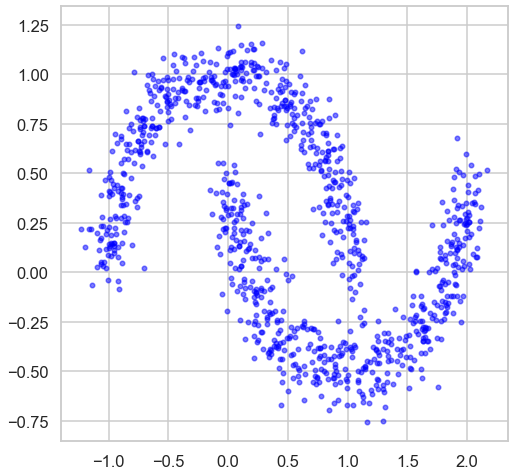

In [11]:
n_samples = 1000
X3, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

<ipython-input-6-14f588adfca1>:32: RuntimeWarning: invalid value encountered in double_scalars
  cluster_erros[i] = 1-np.sum(c*d)/np.sqrt(np.sum(np.square(c))* np.sum(np.square(d)))


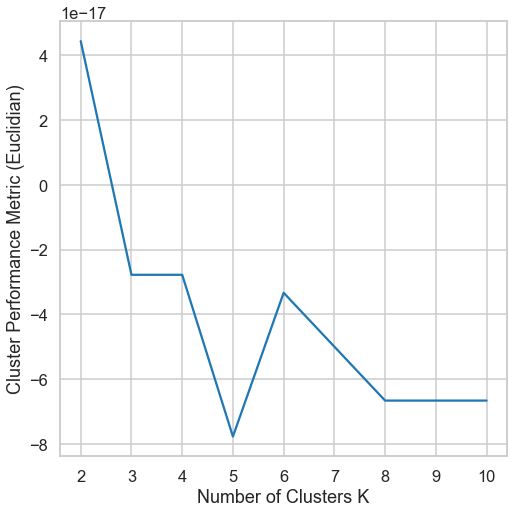

<ipython-input-6-14f588adfca1>:23: RuntimeWarning: invalid value encountered in true_divide
  Cluster_Centroids = new_clusters / (num_in_clusters);


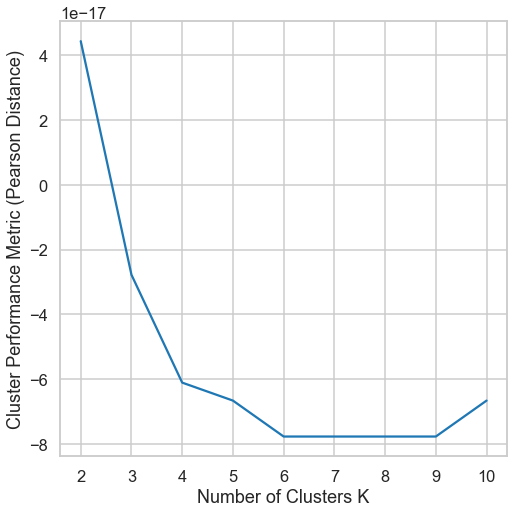

In [14]:
curr = []
error = []
for i in range(2, 11):
  curr.append(i)
  Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X1, i,  "Euclidian")
  error.append(Cluster_Metric)

plt.plot(curr , error)
plt.ylabel('Cluster Performance Metric (Euclidian)')
plt.xlabel('Number of Clusters K')
plt.show()

plt.figure()

curr = []
error = []
for i in range(2, 11):
  curr.append(i)
  Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X1, i,  "Pearson")
  error.append(Cluster_Metric)

plt.plot(curr , error)
plt.ylabel('Cluster Performance Metric (Pearson Distance)')
plt.xlabel('Number of Clusters K')
plt.show()

<ipython-input-6-14f588adfca1>:32: RuntimeWarning: invalid value encountered in double_scalars
  cluster_erros[i] = 1-np.sum(c*d)/np.sqrt(np.sum(np.square(c))* np.sum(np.square(d)))
<ipython-input-6-14f588adfca1>:23: RuntimeWarning: invalid value encountered in true_divide
  Cluster_Centroids = new_clusters / (num_in_clusters);


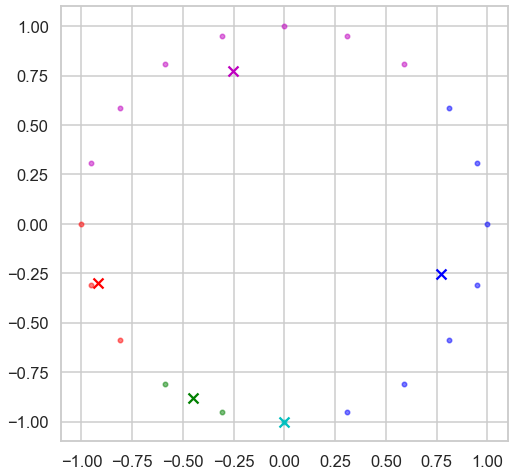

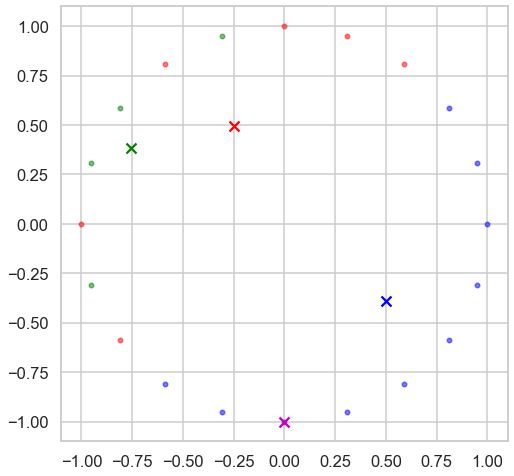

In [17]:
#EUCLIDIAN
# k=5 has the best performance metric
n_clusters = 5
Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X1, n_clusters,  "Euclidian")
display_cluster(np.array(X1), num_clusters=n_clusters, cluster_centers_ = Cluster_Centroids, labels_ = nearest_clusters)

plt.figure()

#PEARSON
# k=6 has best performance metric
n_clusters = 6
Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X1, n_clusters,  "Pearson")
display_cluster(np.array(X1), num_clusters=n_clusters, cluster_centers_ = Cluster_Centroids, labels_ = nearest_clusters)

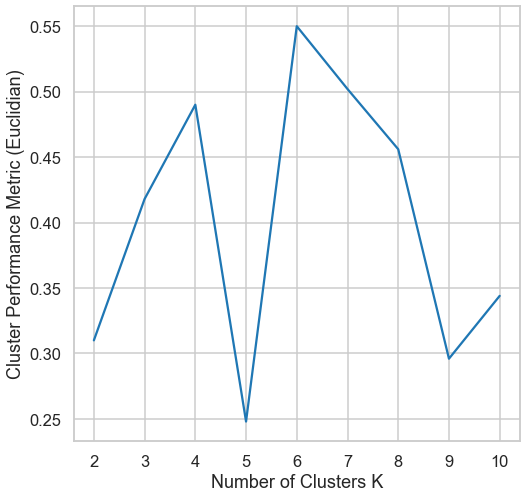

<ipython-input-6-14f588adfca1>:23: RuntimeWarning: invalid value encountered in true_divide
  Cluster_Centroids = new_clusters / (num_in_clusters);


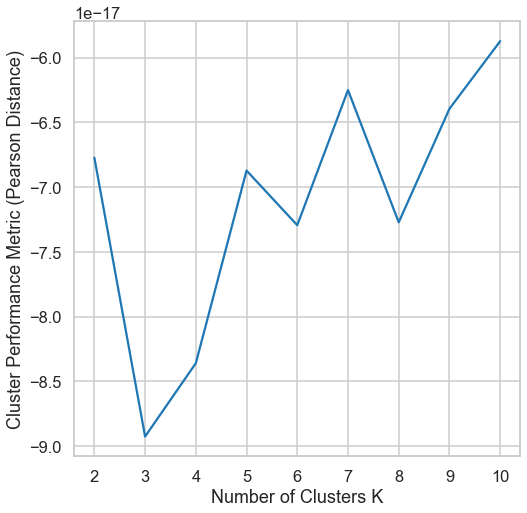

In [18]:
curr = []
error = []
for i in range(2, 11):
  curr.append(i)
  Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X2, i,  "Euclidian")
  error.append(Cluster_Metric)

plt.plot(curr , error)
plt.ylabel('Cluster Performance Metric (Euclidian)')
plt.xlabel('Number of Clusters K')
plt.show()

plt.figure()

curr = []
error = []
for i in range(2, 11):
  curr.append(i)
  Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X2, i,  "Pearson")
  error.append(Cluster_Metric)

plt.plot(curr , error)
plt.ylabel('Cluster Performance Metric (Pearson Distance)')
plt.xlabel('Number of Clusters K')
plt.show()

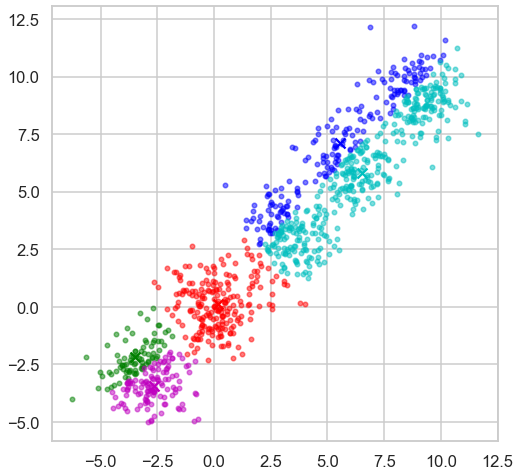

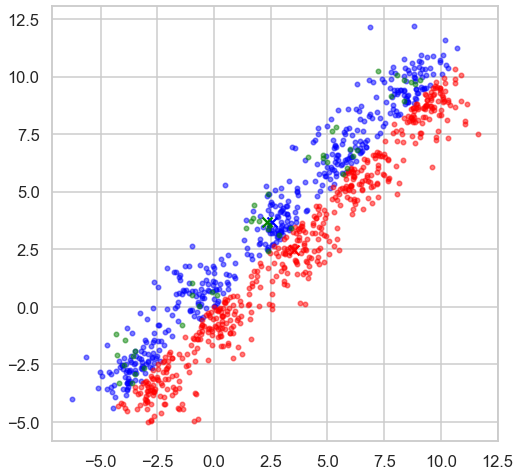

In [20]:
#EUCLIDIAN
# Using elbow method as in lecture k=5 is the best #of clusters here
n_clusters = 5
Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X2, n_clusters,  "Euclidian")
display_cluster(np.array(X2), num_clusters=n_clusters, cluster_centers_ = Cluster_Centroids, labels_ = nearest_clusters)

plt.figure()

#PEARSON
# Using elbow method as in lecture k=3 is the best #of clusters here
n_clusters = 3
Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X2, n_clusters,  "Pearson")
display_cluster(np.array(X2), num_clusters=n_clusters, cluster_centers_ = Cluster_Centroids, labels_ = nearest_clusters)

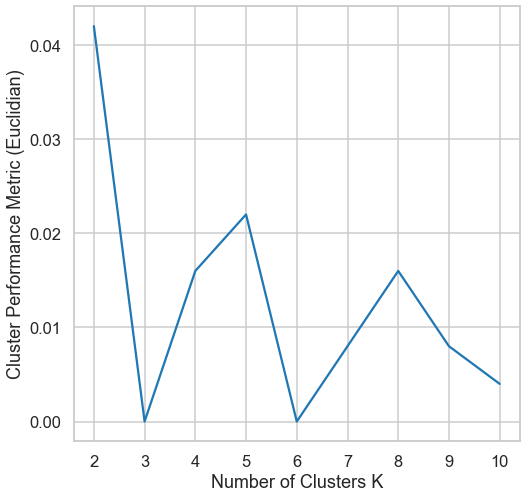

<ipython-input-6-14f588adfca1>:23: RuntimeWarning: invalid value encountered in true_divide
  Cluster_Centroids = new_clusters / (num_in_clusters);


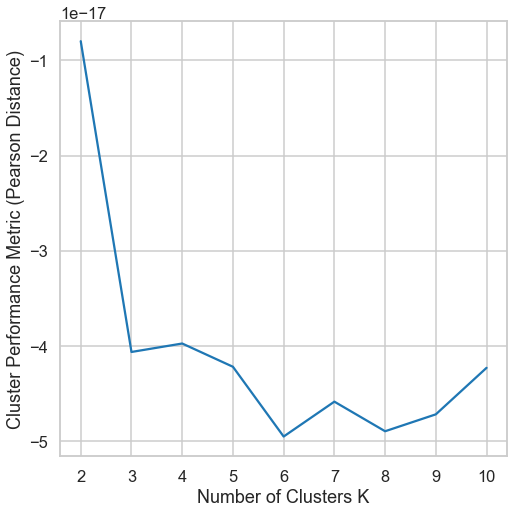

In [26]:
curr = []
error = []
for i in range(2, 11):
  curr.append(i)
  Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X3, i,  "Euclidian")
  error.append(Cluster_Metric)

plt.plot(curr , error)
plt.ylabel('Cluster Performance Metric (Euclidian)')
plt.xlabel('Number of Clusters K')
plt.show()

plt.figure()

curr = []
error = []
for i in range(2, 11):
  curr.append(i)
  Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X3, i,  "Pearson")
  error.append(Cluster_Metric)

plt.plot(curr , error)
plt.ylabel('Cluster Performance Metric (Pearson Distance)')
plt.xlabel('Number of Clusters K')
plt.show()

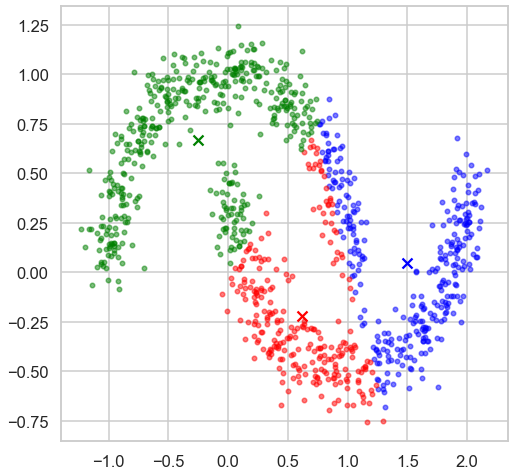

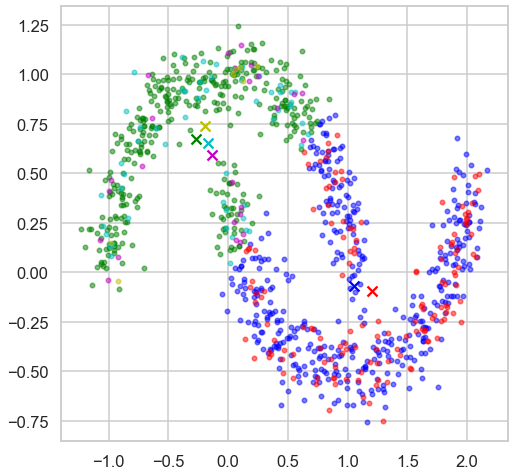

In [27]:
#EUCLIDIAN
# k=3 and k=6 have best performance metrics in this case
n_clusters = 3
Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X3, n_clusters,  "Euclidian")
display_cluster(np.array(X3), num_clusters=n_clusters, cluster_centers_ = Cluster_Centroids, labels_ = nearest_clusters)

plt.figure()

#PEARSON
#Graph keeps going up and down but it is lowest at 6 so, K = 6 is a good candidate
n_clusters = 6
Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(X3, n_clusters,  "Pearson")
display_cluster(np.array(X3), num_clusters=n_clusters, cluster_centers_ = Cluster_Centroids, labels_ = nearest_clusters)

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [24]:
data_np = data.to_numpy()

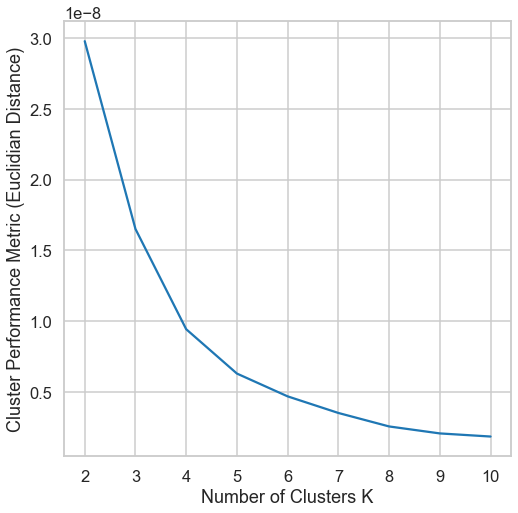

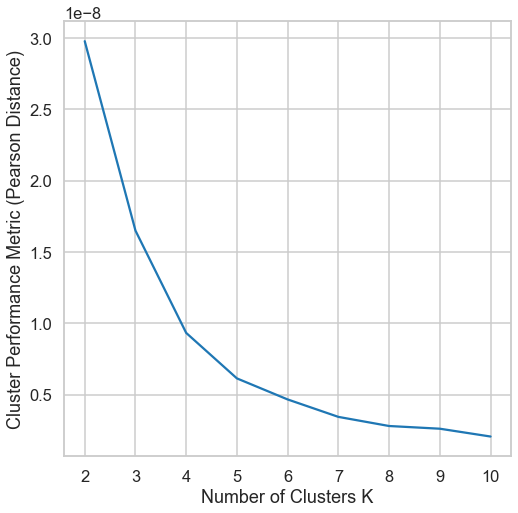

In [25]:
curr = []
error = []
for i in range(2, 11):
#     2 included, 11 not included
  curr.append(i)
  Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(data_np, i,  "Euclidian")
  error.append(Cluster_Metric)

plt.plot(curr , error)
plt.ylabel('Cluster Performance Metric (Euclidian Distance)')
plt.xlabel('Number of Clusters K')
plt.show()

plt.figure()

curr = []
error = []
for i in range(2, 11):
  curr.append(i)
  Cluster_Centroids , Cluster_Metric, nearest_clusters = GUC_Kmean(data_np, i,  "Pearson")
  error.append(Cluster_Metric)

plt.plot(curr , error)
plt.ylabel('Cluster Performance Metric (Pearson Distance)')
plt.xlabel('Number of Clusters K')
plt.show()